In [1]:
from IPython.display import Image, display

# 1 Classification
## 1-1 레고블럭 분류하기 : 홀수 돌기이면 왼쪽, 짝수 돌기이면 오른쪽으로 분류해보자

Classify odds or evens


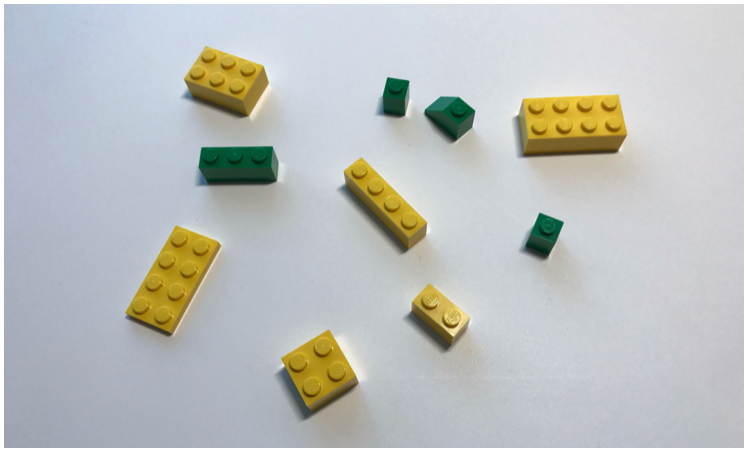

In [2]:
print('Classify odds or evens')
with open('input_with_label.png', 'rb') as f:
    display(Image(f.read()))

## 1-2 어떤 모델이 잘 분류했는가 ?

A to F Model Result : ex A Model is correct result.


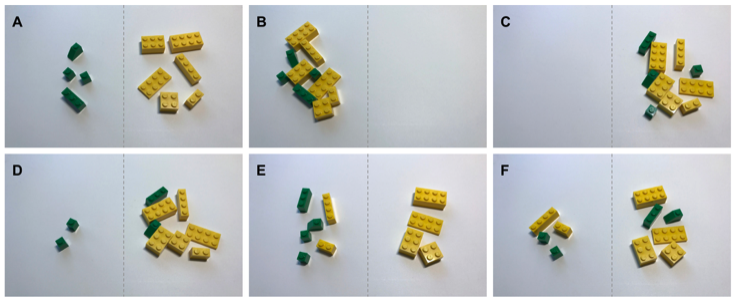

In [3]:
print('A to F Model Result : ex A Model is correct result.' )
with open('A_to_F_Model.png', 'rb') as f:
    display(Image(f.read()))

# 2 Evaluation for Classification
## 2-1 평가 : 정확도Accuracy, 민감도Sensitivity, 특이도Specificity

# 책에 없는 내용이지만 참조함 #

# 3 Eval from Machine Learning

## 3-1 지도학습 Supervised Learning
### 3-1-1 훈련 데이터(Training Data)로부터 하나의 함수(모델)를 유추함
### 3-1-2 훈련 데이터는 일반적으로 입력 객체에 대해 속성을 벡터 형태로 포함하고 있으며, 각각 벡터(독립변수)에 대해 원하는 결과(종속 변수)가 포함

## 3-2 교차 검증 Cross Validation
### 3-2-1 교차 검증(Cross-Validation) : Training-Set으로 학습한 함수(모델)을 Validation-Set으로 검증한다.

## 3-3 혼동 행렬 Confusion Matrix
### 3-3-1 True Positive - 유추된 함수에 의해 추론된 결과(참)와 실제 결과가 같음. 관심 범주를 정확하게 분류
### 3-3-2 False Positive - 실제 결과가 거짓인데 참으로 추론한 경우. 관심 범주로 잘못 분류
### 3-3-3 False Negative - 실제 결과가 참인데 거짓으로 추론한 경우. 관심 범주가 아닌 것으로 잘못 분류
### 3-3-4 True Negative - 유추된 함수에 의해 추론된 결과(거짓)와 실제 결과가 같음. 관심 범주가 아닌 것을 정확하게 분류

| - | Real T | Real F |
|---|---|---|
| Val T | TP | FP |
| Val F | FN | TN |

In [4]:
# acc = ( TP + TN ) / ( TP + FP + FN + TN )
# error rate = 1 - acc  
# 전체를 기준으로 T를 T로 판별하고, F를 F로 판별하는 비율

In [5]:
# Focus on Real T
# sen = TP /  ( TP + FN ) 
# sen = TP / Real T = TPR = True Positive Rate
# Real T를 기준으로 T를 T로 판별하는 비율

In [6]:
# Focus on Real F
# spe = TN / ( FP + TN )
# spe = TN / Real F = TNR = True Negative Rate
# Real F를 기준으로 F를 F로 판별하는 비율

# ref = https://tykimos.github.io/2017/05/22/Evaluation_Talk/

In [7]:
# 위의 Eval 항목이 모두 좋을 수 없다.
# Classification 의 Target을 알맞게 정의하고 그에 따라 필요한 평가 항목이 무엇을 의미하는지 잘 알아야 한다.
# 암 검사 : 암을 T라고 하자. 중요도 FN >> FP > TP = TN 
# 대출 심사 : 신용이 좋은 것을 T 라고 하자. 중요도 FP >> FN > TP = TN

In [8]:
# confusion-matrix vs cost-matrix
# http://dni-institute.in/blogs/confusion-matrix-and-cost-matrix/
# Type 1 Error = FP rate != Type 2 Error = FN rate
# Not easy to assigning cost of Type 1 Error and Type 2 Error

# 4 전수조사 Complete survey vs 표본조사 Sample survey
## 4-1 위의 예제는 레고블럭 10개에 대한 전수조사이고 
## 4-2 실제 조사에서는 전수조사가 불가능할 수도 있고, 모델이 같은 결과를 출력한다고 보장할 수 없다.
## 4-3 모델 결과를 경우의 수가 아니라 확률로 정의하고, 
## 4-4 임계값threshold 를 기준으로 크면T 작으면F로 정의하자.

F Model Result : ex 3x1 block has odds of 35%


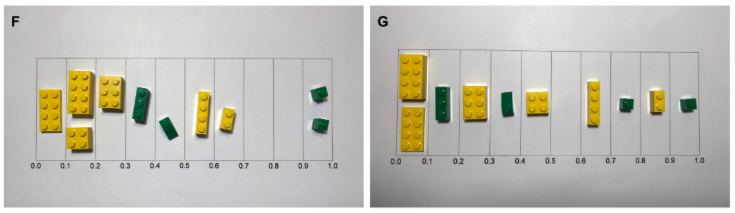

In [9]:
print('F Model Result : ex 3x1 block has odds of 35%')
with open('F_G_Model.png', 'rb') as f:
    display(Image(f.read()))

Increase Threshold makes the difference.


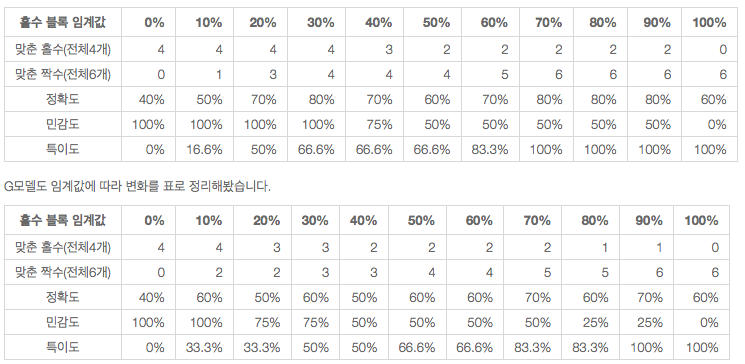

In [10]:
print('Increase Threshold makes the difference.')
with open('Threshold_makes_difference.png', 'rb') as f:
    display(Image(f.read()))

In [11]:
# Threshold 50% 를 기준으로 F Model  is the same as G Model  based on Acc, Sen, Spe.
# 분류 모델의 결과를 도형으로 평가할 수 있을까?

# 5 수신자 조작 특성 ROC Receiver Operation Characteristics
## 5-1 threshold가 증가함에 따라 sen 는 감소하고, spe 는 증가한다.

Caluculate sen and spe with threshold
Then use this as input


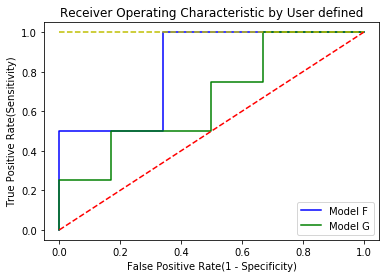

In [12]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

print('Caluculate sen and spe with threshold')
print('Then use this as input')

sens_F = np.array([1.0,  1.0, 1.0,  1.0, 0.75,  0.5,  0.5, 0.5, 0.5, 0.5, 0.0])
spec_F = np.array([0.0, 0.16, 0.5, 0.66, 0.66, 0.66, 0.83, 1.0, 1.0, 1.0, 1.0])

sens_G = np.array([1.0,  1.0, 0.75, 0.75, 0.5,  0.5,  0.5,  0.5, 0.25, 0.25, 0.0])
spec_G = np.array([0.0, 0.33, 0.33,  0.5, 0.5, 0.66, 0.66, 0.83, 0.83,  1.0, 1.0])

plt.title('Receiver Operating Characteristic by User defined')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(1-spec_F, sens_F, 'b', label = 'Model F')   
plt.plot(1-spec_G, sens_G, 'g', label = 'Model G') 
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()


## 5-3 같은 spe에 대해서 sen가 높을 수록 좋은 분류 모델이다.
## 5-4 같은 sen에 대해서 spe가 높을 수록 좋은 분류 모델이다.
## 5-5 같은 sen에 대해서 1-spe가 낮을 수록 좋은 분류 모델이다.
## 5-6 ROC curve 아래 면적을 AUC Area Under Curve 라고 하는데 클수록 좋다.
## 5-7 완벽한 분류 모델은 AUC=1 이다.

Get Block and Probability
Then use this as input


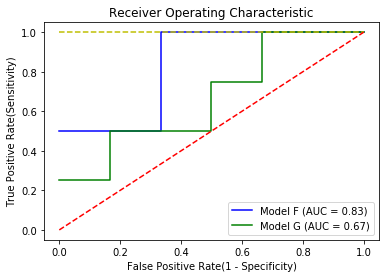

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

print('Get Block and Probability')
print('Then use this as input')

class_F = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.15, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.95, 0.95])

class_G = np.array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.65, 0.75, 0.85, 0.95])

false_positive_rate_F, true_positive_rate_F, thresholds_F = roc_curve(class_F, proba_F)
false_positive_rate_G, true_positive_rate_G, thresholds_G = roc_curve(class_G, proba_G)
roc_auc_F = auc(false_positive_rate_F, true_positive_rate_F)
roc_auc_G = auc(false_positive_rate_G, true_positive_rate_G)

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')


plt.plot(false_positive_rate_F, true_positive_rate_F, 'b', label='Model F (AUC = %0.2f)'% roc_auc_F)
plt.plot(false_positive_rate_G, true_positive_rate_G, 'g', label='Model G (AUC = %0.2f)'% roc_auc_G)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

In [14]:
# F is bettern than G